CNN: Convolutional Neural Networks can be used for computer vision(classify whether a picture of food contains pizza or steak or detect whether or not an object appears in an image)

Computer Vision: it is a practice of writing algorithms which can discover patterns in visual data.

#Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [79]:
import zipfile
#getting the zipped dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
#unziping the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")  #file name
zip_ref.extractall()
zip_ref.close()

--2022-11-24 09:37:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2022-11-24 09:37:54 (19.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



#Inspecting the dataset



In [80]:
 #listing the files
 
!ls pizza_steak

test  train


In [83]:
!ls pizza_steak/train


pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#walking through pizza_steak directory and list number of files
for dirpaths, dirs, files in os.walk("pizza_steak"):
  print(f"There are {len(dirs)} directories and {len(files)} images in '{dirpaths}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

we've got a collection of 750 training images and 250 testing images of pizza and steak.

In [84]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


#Visualizing the data

In [ ]:
#viewing the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup target directory to view images from here
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #show the shape of the image
  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


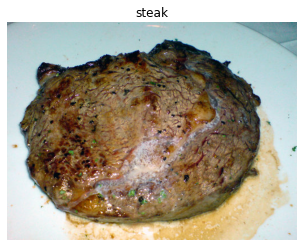

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
#viewing the image as a big array/tensor

img

array([[[113, 130, 146],
        [116, 134, 148],
        [116, 132, 145],
        ...,
        [ 83, 115, 130],
        [ 66, 129, 136],
        [ 76, 125, 139]],

       [[106, 125, 140],
        [114, 133, 147],
        [118, 136, 146],
        ...,
        [ 84, 124, 134],
        [ 71, 124, 132],
        [ 80, 111, 129]],

       [[109, 133, 145],
        [114, 136, 147],
        [114, 132, 142],
        ...,
        [ 83, 126, 133],
        [ 77, 127, 134],
        [ 84, 118, 130]],

       ...,

       [[227, 222, 226],
        [227, 221, 225],
        [229, 220, 225],
        ...,
        [205, 220, 225],
        [206, 219, 227],
        [208, 218, 227]],

       [[229, 224, 228],
        [227, 222, 226],
        [227, 222, 226],
        ...,
        [207, 220, 226],
        [208, 218, 227],
        [208, 218, 227]],

       [[228, 226, 231],
        [227, 225, 230],
        [225, 224, 229],
        ...,
        [209, 220, 226],
        [209, 218, 227],
        [209, 218, 227]]

In [ ]:
#let's view the shape again: returns(width, height, colour channels)
img.shape
#In our case, the width and height vary but 
#because we're dealing with colour images, 
#the colour channels value is always 3. 
#This is for different values of [red, green and blue (RGB) pixels]

(384, 512, 3)

when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

#Normalizing the pixel values

In [ ]:
#get all the pixel values between 0 and 1
img/255

array([[[0.44313725, 0.50980392, 0.57254902],
        [0.45490196, 0.5254902 , 0.58039216],
        [0.45490196, 0.51764706, 0.56862745],
        ...,
        [0.3254902 , 0.45098039, 0.50980392],
        [0.25882353, 0.50588235, 0.53333333],
        [0.29803922, 0.49019608, 0.54509804]],

       [[0.41568627, 0.49019608, 0.54901961],
        [0.44705882, 0.52156863, 0.57647059],
        [0.4627451 , 0.53333333, 0.57254902],
        ...,
        [0.32941176, 0.48627451, 0.5254902 ],
        [0.27843137, 0.48627451, 0.51764706],
        [0.31372549, 0.43529412, 0.50588235]],

       [[0.42745098, 0.52156863, 0.56862745],
        [0.44705882, 0.53333333, 0.57647059],
        [0.44705882, 0.51764706, 0.55686275],
        ...,
        [0.3254902 , 0.49411765, 0.52156863],
        [0.30196078, 0.49803922, 0.5254902 ],
        [0.32941176, 0.4627451 , 0.50980392]],

       ...,

       [[0.89019608, 0.87058824, 0.88627451],
        [0.89019608, 0.86666667, 0.88235294],
        [0.89803922, 0

#Architecture of CNN

1. Input images: Target images you'd like to discover patterns in
2. Input layer: Takes in target images and preprocesses them for further layers
3. Convolutional layer: Extracts/learns the most important features from target images
4. Hidden activation:Adds non-linearity to learned features (non-straight lines), usually ReLU
5. Pooling layer: Reduces the dimensionality of learned image features
6. Fully connected layer: Further refines learned features from convolution layers
7. Output layer: Takes learned features and outputs them in shape of target labels
8. Output activation: Adds non-linearities to output layer

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline to try and beat it.

#Building the model

load the images

preprocess the images

build a CNN to find patterns in the images

compile the CNN

Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting the random see
tf.random.set_seed(22)

#preprocess the data to get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup the train and test directories
train_dir ="pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=22)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=22)

#building the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
                           kernel_size = 3, 
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, 
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compiling the CNN
model.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

#Fitting the model
history_1 = model.fit(train_data, epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 216ms/step - loss: 0.5411 - accuracy: 0.7280 - val_loss: 0.4176 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4832 - accuracy: 0.7893 - val_loss: 0.4953 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4405 - accuracy: 0.8087 - val_loss: 0.3725 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3927 - accuracy: 0.8340 - val_loss: 0.4507 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3642 - accuracy: 0.8467 - val_loss: 0.4119 - val_accuracy: 0.8120


In [ ]:
len(train_data) #i.e, (750+750)/32 per batch

47

Epoch 1/5
47/47 [==============================] - 102s 2s/step

We can see that for each epoch its taking more time so let's improve the speed by changing the runtime type to GPU and re-run the cells above 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting the random see
tf.random.set_seed(22)

#preprocess the data to get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup the train and test directories
train_dir ="pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=22)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=22)

#building the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
                           kernel_size = 3, 
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, 
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.Conv2D(10, 
                           3, 
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compiling the CNN
model.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

#Fitting the model
history_1 = model.fit(train_data, epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6773 - accuracy: 0.6027 - val_loss: 0.5744 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5220 - accuracy: 0.7553 - val_loss: 0.4758 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4725 - accuracy: 0.7833 - val_loss: 0.4107 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4233 - accuracy: 0.8187 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3689 - accuracy: 0.8453 - val_loss: 0.4132 - val_accuracy: 0.8000


After changing the runtime type to GPU, we can see that the time has reduced for each epoch

First epoch takes a bit more time than the rest epochs because it needs to load the whole data

#Model-1 Summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

#Model_2

A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
#setting the random seed
tf.random.set_seed(22)

#creating a model to replicate the TF playground model
model_2 = tf.keras.Sequential([
    # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compiling the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.8551 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


We can see that our model ran but it could only reach upto 50% accuracy on both the training and test sets, which in a binary classification problem is as good as guessing.

In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


#Model_3

We can see that even after having more number of trainable parameters in model_2 it couldn't perform better than model_1

Now let's increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [18]:
#setting the random seed
tf.random.set_seed(22)

#creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),#1D vector
    tf.keras.layers.Dense(100, activation = 'relu'),#increased no.of neurons
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),#added extra layer
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#compiling the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fitting the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 2.4480 - accuracy: 0.6313 - val_loss: 0.7379 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6354 - accuracy: 0.7320 - val_loss: 0.4328 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6035 - accuracy: 0.7393 - val_loss: 0.6294 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5150 - accuracy: 0.7693 - val_loss: 0.5438 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5182 - accuracy: 0.7680 - val_loss: 0.8637 - val_accuracy: 0.5860


 Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

In [19]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

#Binary classification: Let's break it down

We just went through a whirlwind of steps:

Become one with the data (visualize, visualize, visualize...)

Preprocess the data (prepare it for a model)

Create a model (start with a baseline)

Fit the model

Evaluate the model

Adjust different parameters and improve model (try to beat your baseline)

Repeat until satisfied

Let's step through each.

#1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

In [20]:
#we have already imported the data

Image shape: (382, 512, 3)
Image shape: (384, 512, 3)


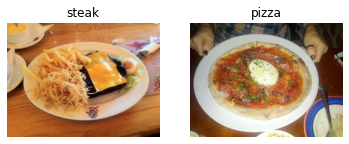

In [21]:
#visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

#2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [22]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

##creating batches

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [23]:

# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,#target directory of images
                                               target_size=(224, 224),#target size of the images(height, width)
                                               class_mode='binary',#type of data you are working with
                                               batch_size=32)#size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
#get a sample of a train data batch
images, labels = train_data.next()  #gets the "next" batch of images/labels in train
len(images), len(labels)

(32, 32)

In [26]:
#how many batches are there
len(train_data) #1500/32

47

In [27]:
#get the first two images
images[:2], images[0].shape

(array([[[[0.9294118 , 0.9294118 , 0.93725497],
          [0.9294118 , 0.9215687 , 0.92549026],
          [0.94117653, 0.92549026, 0.91372555],
          ...,
          [0.94117653, 0.94117653, 0.94117653],
          [0.94117653, 0.94117653, 0.94117653],
          [0.95294124, 0.9490197 , 0.94117653]],
 
         [[0.92549026, 0.92549026, 0.9333334 ],
          [0.9294118 , 0.9215687 , 0.92549026],
          [0.93725497, 0.9215687 , 0.9176471 ],
          ...,
          [0.94117653, 0.94117653, 0.94117653],
          [0.94117653, 0.94117653, 0.94117653],
          [0.94117653, 0.9333334 , 0.93725497]],
 
         [[0.9215687 , 0.9294118 , 0.92549026],
          [0.92549026, 0.92549026, 0.92549026],
          [0.92549026, 0.9215687 , 0.91372555],
          ...,
          [0.93725497, 0.93725497, 0.93725497],
          [0.94117653, 0.94117653, 0.94117653],
          [0.94117653, 0.9333334 , 0.93725497]],
 
         ...,
 
         [[0.47058827, 0.454902  , 0.45882356],
          [0.12156

we can see that our data is scaled to between 0 and 1 with rgb tensor values of the images

In [28]:
images[8].shape

(224, 224, 3)

In [29]:
#view the first batch of labels
labels

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

#3. Creating the CNN model starting with a baseline model

In [30]:
#make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

##Components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

filters - these are the number of "feature extractors" that will be moving over our images.

kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.

padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.


##Model_4

In [31]:
#create the model (this will be our baseline, a layer CNN)

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)), #input layer shape
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1, activation="sigmoid")#output layer working with binary classification so only 1 output neuron

])

In [32]:
#compile the model

model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )

In [33]:
#getting the summary of our model

model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#4. Fitting the model

In [34]:
#let's check the len of training and test data
len(train_data), len(test_data)

(47, 16)

In [35]:
history_4 = model_4.fit(train_data, #this is a combination of labels and sample data(y and x)
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.7970 - accuracy: 0.7260 - val_loss: 0.4144 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4109 - accuracy: 0.8293 - val_loss: 0.4148 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.2285 - accuracy: 0.9240 - val_loss: 0.3719 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.0651 - accuracy: 0.9847 - val_loss: 0.4399 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0220 - accuracy: 0.9947 - val_loss: 0.4769 - val_accuracy: 0.8020


In [ ]:
#lets compare with model_1 results

model.evaluate(test_data)

In [ ]:
model.summary()

#5. Evaluating our baseline model: model_4

In [ ]:
#let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (7,8))

In [ ]:
#plot the validation and training curves seperately

def  plot_loss_curves(history):
  #returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  #how many epochs did we run for

  #plotting the loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label= "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plotting the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label= "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  

In [ ]:
#now let's check out the loss and accuracy of our model_4
plot_loss_curves(history_4)

When a model's validation loss starts to increase it means that the model is overfitting the training dataset too well aned thus the model's ability to generalize to unseen data will be diminished.

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
model_4.summary()  

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

A ConvNet with max pooling
A ConvNet with max pooling and data augmentation

#6. Adjusting the model parameters

#Model_5

In [ ]:
#let's build the same structure as model_4 
#but with a MaxPool2D() layer after each convolutional layer

model_5 = Sequential([
    Conv2D(10, 3, activation = "relu",
           input_shape = (224,224,3)),
    #reduce number of features by half
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

In [ ]:
model_5.summary()

the output shape in each MaxPooling2D layer gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

In [ ]:
#let's check the loss curves of model_5

plot_loss_curves(history_5)

looks like our validation loss is increasing towards the end and in turn potentially leading to overfitting.

Another method of overfitting is data augmentation

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.


In [ ]:
#creating ImageDataGenerator training instance
#with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to do

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
#let's get the data batch samples
# Note: labels aren't augmented, they stay the same
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
#let's visualize data augmentation
#by viewing the original image and the augmented image

random_number = random.randint(0,32)
# we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


#Model_6

In [ ]:
#let's now create a model with augmented data

model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

our model didn't get very good results on the training set to begin with

It's because when we created train_data_augmented we turned off data shuffling using 'shuffle=False' which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily when compared to the training data, because it contains shuffled data.

Since we only set 'shuffle=False' for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting 'shuffle=True' on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

In [53]:
#let's shuffle the augmented training data

# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


#Model_7

In [ ]:
#now let's create another model with shuffled augmented data 
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

We can see that the training curves get a lot closer to eachother and also our model_7 performs better than model_6.

#7. Repeat until satisfied


We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

Increase the number of model layers (e.g. add more convolutional layers).

Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).

Train for longer (more epochs).

Finding an ideal learning rate.

Get more data (give the model more opportunities to learn).

Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

#Model_8

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
#let's view the accuracy score of our model_1
model.evaluate(test_data)

In [ ]:
#let's check the architecture of model_1 which is same as model_8
model.summary()

In [ ]:
model_8.summary()

In [ ]:
#let's compare the model 1 and model 8 loss curves
plot_loss_curves(history_1)

In [ ]:
plot_loss_curves(history_8)

--2022-11-24 09:27:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-11-24 09:27:31 (232 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



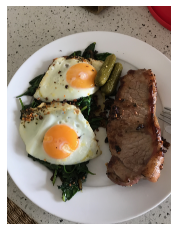

In [71]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [72]:
#let's check the shape of the steak

steak.shape

(4032, 3024, 3)

We can import and decode our image using 'tf.io.read_file'(for reading files) and 'tf.image'(for resizing our image and turning it into a tensor).

In [73]:
def load_and_prep_image(filename, img_shape = 224):
  """Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel)."""

  #read in target file(an image)
  img = tf.io.read_file(filename)

  #decode the read file into a tensor and ensure 3 colour channels
  #(our model is trained on images with 3 colour channels 
  #and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  #resize the image(to the same size of our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #rescale the image(get all values between 0 and 1)
  img = img/255.
  return img


In [74]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

This won't work becaus our image is in the shape as the images our model has been trained on, we're still missing a dimension.

In [75]:
#let's predict with our model
model_8.predict(steak)

ValueError: ignored

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims at axis 0.

In [76]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


We can now see that our custom image has a batch size of 1.

In [77]:
#lets now again predict 

pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 360ms/step


array([[0.94546074]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [85]:
#let's look at the class names

class_names

array(['pizza', 'steak'], dtype='<U5')

In [86]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

Now let's create a function which imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class as the title.

In [91]:
def pred_and_plot(model, filename, class_names):
  #import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis =0))
  print(pred)

  #get the predicted class
  pred_class = class_names[int(tf.round(pred[0][0]))]

  #plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 23ms/step
[[0.94546074]]


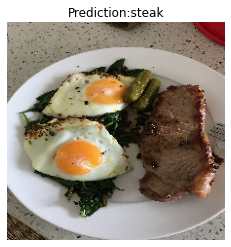

In [92]:
#now let's test this function on our custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Nice! Our model got the prediction right.

Let's try one more image.

--2022-11-24 09:53:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-11-24 09:53:43 (216 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 28ms/step
[[0.3661679]]


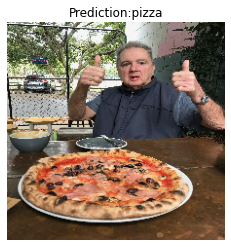

In [93]:
#let's download another image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

#Multiclass Classification

Multi-class Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

How about we go through those steps again, except this time, we'll work with 10 different types of food.

Become one with the data (visualize, visualize, visualize...)

Preprocess the data (prepare it for a model)

Create a model (start with a baseline)

Fit the model

Evaluate the model

Adjust different parameters and improve model (try to beat your baseline)

Repeat until satisfied

##1.Import and become one with the data

In [94]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-24 10:02:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.5MB/s    in 22s     

2022-11-24 10:03:19 (22.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the 10_food_classes file.

In [95]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

let's now setup the training and test directory paths

In [96]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

let's view the class names from the subdirectories

In [99]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

let's visualize an image from the training set

Image shape: (512, 512, 3)


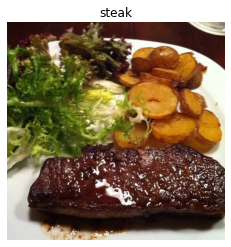

In [100]:
import random
img = view_random_image(target_dir= train_dir,
                        target_class = random.choice(class_names))# get a random class name

##2. Preprocess the data(prepare it for a model)

It's good to visualize at least 10-100 different examples.

Time to preprocess the data.

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#let's rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#load the data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


We have changed the class_mode parameter to 'categorical' because we are dealing with 10 classes of food images.Rest of them are same.

The image size is 224x224. This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

##3. Create a model(start with a baseline)

Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).

Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.

Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

##Model_9

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##4.Fit the model

In [105]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 199ms/step - loss: 2.1369 - accuracy: 0.2224 - val_loss: 1.9918 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.8894 - accuracy: 0.3448 - val_loss: 1.8792 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.4816 - accuracy: 0.4939 - val_loss: 2.0386 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.8175 - accuracy: 0.7328 - val_loss: 2.5653 - val_accuracy: 0.2672
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.2951 - accuracy: 0.9147 - val_loss: 3.8271 - val_accuracy: 0.2368


##5. Evaluate the model

In [106]:
#let's evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 3.8271 - accuracy: 0.2368


[3.8271360397338867, 0.23680000007152557]

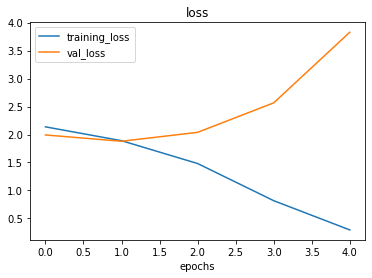

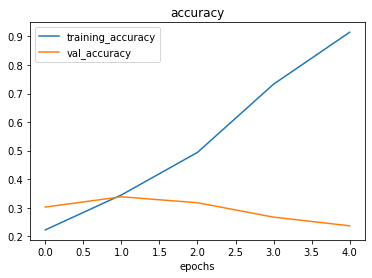

In [107]:
#let's view the model's loss curves on the 10 classes
plot_loss_curves(history_9)

The gap between the training and validation loss curves tells us that our model is overfitting the training set.(i.e, it gives great results on the training data but not on the unseen data.)

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

##6.Adjusting the model parameters

A couple of ways to prevent overfitting include:

Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

##Model_10

In [108]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 272ms/step - loss: 2.2469 - accuracy: 0.2197 - val_loss: 2.0227 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.8711 - accuracy: 0.3527 - val_loss: 1.9583 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 46s 196ms/step - loss: 1.5082 - accuracy: 0.4952 - val_loss: 2.1130 - val_accuracy: 0.3072
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 0.9784 - accuracy: 0.6856 - val_loss: 2.3855 - val_accuracy: 0.2924
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.5172 - accuracy: 0.8500 - val_loss: 2.9086 - val_accuracy: 0.2628


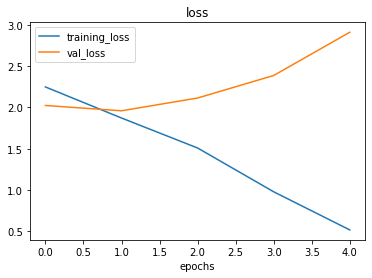

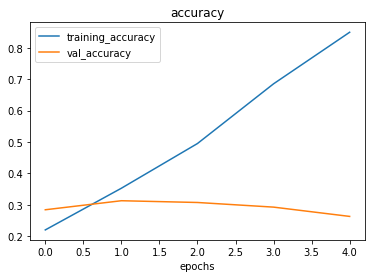

In [109]:
#let's check for the loss curves

plot_loss_curves(history_10)

It still looks like our model is still overfitting the training data.

Let's now try data augmentation.

In [110]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

##Model_11

In [111]:
#let's clone the model 
model_11 = tf.keras.models.clone_model(model_10)

#compile the cloned model with the same setup use for model_10
model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#fitting the model
history_11 = model_11.fit(train_data_augmented, 
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data =test_data,
                          validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 124s 526ms/step - loss: 2.1729 - accuracy: 0.2160 - val_loss: 2.0139 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 136s 579ms/step - loss: 2.0515 - accuracy: 0.2737 - val_loss: 1.8906 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 116s 494ms/step - loss: 2.0040 - accuracy: 0.2953 - val_loss: 1.8862 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 112s 475ms/step - loss: 1.9753 - accuracy: 0.3083 - val_loss: 1.8355 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 139s 592ms/step - loss: 1.9576 - accuracy: 0.3236 - val_loss: 1.7955 - val_accuracy: 0.3848


We can see that each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

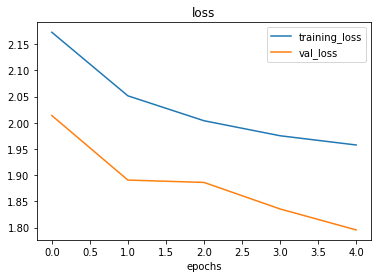

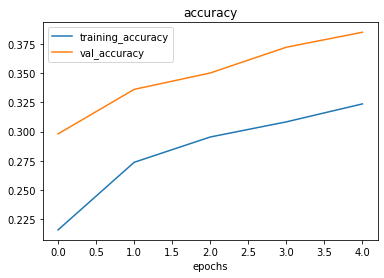

In [112]:
#let's view the loss curves
plot_loss_curves(history_11)

We can see that our loss curves are much closer to each other but still performed much better on the validation dataset but not on the augmented training set.

It looks like if we kept it training for longer(more epochs) then the evaluation metrics might continue to improve.

##7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

##Making prediction with our trained model

In [114]:
#let's first view the class names 
#with which our multi classification model has been created

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Now let's upload some images for prediction

In [115]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


let's now predict on this images using the pred_and_plot function


1/1 [==============================] - 0s 78ms/step
[[0.05697898 0.04325151 0.03733699 0.24361612 0.07938737 0.1092381
  0.02749066 0.07049302 0.2669568  0.06525052]]


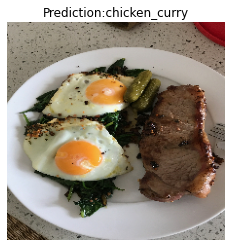

In [116]:
#making a prediction using model_11
pred_and_plot(model = model_11, 
              filename = "03-steak.jpeg", 
              class_names= class_names)

It looks like our model has predicted wrong.

Let's predict another image

1/1 [==============================] - 0s 17ms/step
[[0.20641284 0.0471331  0.04330929 0.06347796 0.09210535 0.0157994
  0.18306886 0.15642789 0.03685814 0.15540718]]


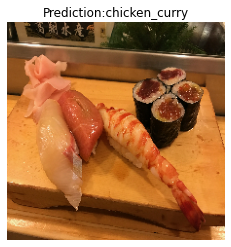

In [117]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

Again, it's predicting chicken_curry for some reason.

Let's try another one...

1/1 [==============================] - 0s 17ms/step
[[0.06100313 0.01740214 0.0722919  0.01104025 0.05891128 0.4793058
  0.07902062 0.05692212 0.02140472 0.14269812]]


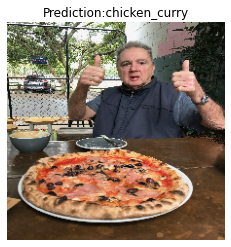

In [118]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

chicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

1/1 [==============================] - 0s 16ms/step
[[0.05697898 0.04325151 0.03733699 0.24361612 0.07938737 0.1092381
  0.02749066 0.07049302 0.2669568  0.06525052]]


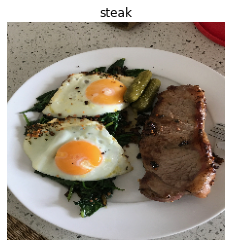

In [119]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))
print(pred)

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);


Perfect!!!

So, there might be a problem with our 'pred_and_plot' function.

And the problem is that, the pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function.

In [120]:
#let's view the output of the predicted function again
pred

array([[0.05697898, 0.04325151, 0.03733699, 0.24361612, 0.07938737,
        0.1092381 , 0.02749066, 0.07049302, 0.2669568 , 0.06525052]],
      dtype=float32)

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

In [121]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [122]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [123]:
pred[0]

array([0.05697898, 0.04325151, 0.03733699, 0.24361612, 0.07938737,
       0.1092381 , 0.02749066, 0.07049302, 0.2669568 , 0.06525052],
      dtype=float32)

In [124]:
len(pred[0])

10

Now let's try predicting again with the new 'pred_and_plot'

1/1 [==============================] - 0s 33ms/step


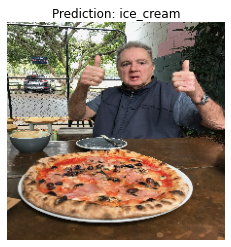

In [125]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


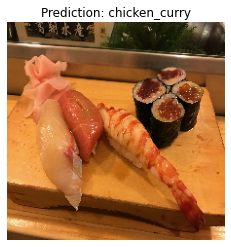

In [126]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 15ms/step


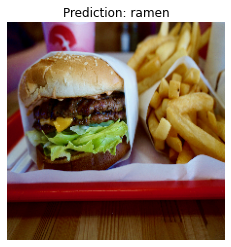

In [127]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)


1/1 [==============================] - 0s 40ms/step


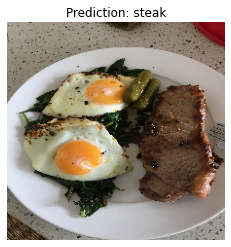

In [128]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~40% accuracy on the test dataset.

#Saving and loading our model

In [129]:
# Save a model
model_11.save("saved_trained_model")

In [130]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 12s 142ms/step - loss: 1.7955 - accuracy: 0.3848


[1.7954713106155396, 0.384799987077713]

In [131]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)


79/79 [==============================] - 11s 137ms/step - loss: 1.7955 - accuracy: 0.3848


[1.795471429824829, 0.384799987077713]